<p style="font-size:23px;font-family:'Ubuntu'">Finding the shortest path on image</p>
<br>

This worksheet represents implementation of [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) to find the shortest path from one point to another in the image. The image will be represented as a [Hypsometric tints](https://en.wikipedia.org/wiki/Hypsometric_tints). That means that every point (pixel) shows different elevation level. Choosing the path through the the lowest elevation levels is considered to be the most efficient choice. 
<br>

modules used in this worksheet includes **matplotlib** pyplot, **scipy** for interpolation and distance computations, **heapq** that provides an implementation of the heap queue algorithm, also known as the priority queue algorithm, **imageio** to play with image and **numpy**;

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# a simple demonstration on what numpy allows you to do with arrays;

In [3]:
np.array([1,2,3,4,5]);

In [4]:
domain = np.arange(1, 10)
domain;

In [5]:
squares = domain ** 4
squares;

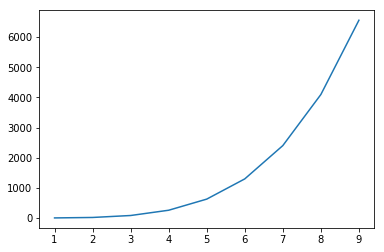

In [6]:
plt.plot(domain, squares);

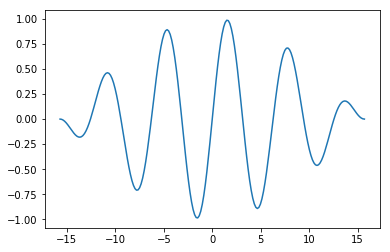

In [7]:
domain = np.linspace(-5*np.pi, 5*np.pi, num=200)
sinus = np.sin(domain) * np.cos(domain/10)
plt.plot(domain, sinus);

In [8]:
heights = np.array([[2, 1, 5, 6], [3, 8, 7, 4]])
heights # two dimensional numpy array heights

array([[2, 1, 5, 6],
       [3, 8, 7, 4]])

In [9]:
heights.shape 

(2, 4)

In [10]:
terrain = np.random.random((10, 10)) # initialization of the map

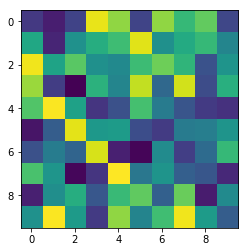

In [11]:
plt.imshow(terrain);

In [12]:
def interpolate(array, new_shape):
    """ interpolation of our array """
    
    from scipy.interpolate import RectBivariateSpline
    
    # prepare source coordinates
    old_xs, old_ys = (np.arange(dim) for dim in array.shape)
    
    # return evenly spaced numbers over a specified interval.
    new_xs, new_ys = (np.linspace(0, old_dim-1, num=new_dim) 
                      for new_dim, old_dim 
                      in zip(new_shape, array.shape))
    
    # bivariate spline approximation over a rectangular mesh
    interpolation = RectBivariateSpline(old_xs, old_ys, array)
    
    return interpolation(new_xs, new_ys)

In [13]:
a = np.arange(16).reshape((4, 4))
np.around(interpolate(a, (7, 7)), 1)

array([[ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ],
       [ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ],
       [ 4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ],
       [ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ],
       [ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ],
       [10. , 10.5, 11. , 11.5, 12. , 12.5, 13. ],
       [12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]])

In [14]:
def gen_terrain(shape=(10, 10), height=100, smooth=10):
    """ generate random map and interpolate it """
    
    dimensions = np.array([*shape])
    terrain = np.random.random(dimensions)
    return interpolate(terrain, dimensions * smooth) * height

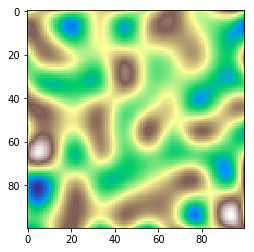

In [15]:
plt.imshow(gen_terrain(smooth=10), cmap='terrain'); #https://matplotlib.org/examples/color/colormaps_reference.html

In [16]:
def inside(array, point):
    """ check if point(pixel) is inside an area """
    
    rows, cols = array.shape
    r, c = point
    return 0 <= r < rows and 0 <= c < cols

In [17]:
hills = heights > 6 # hills are values in the map that are greater than 6

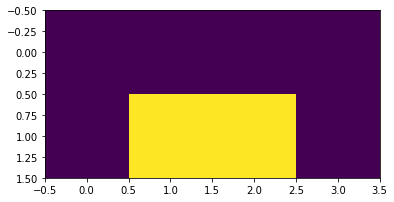

In [18]:
plt.imshow(hills);

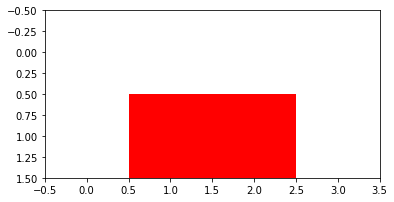

In [19]:
import numpy.ma as ma
masked_hills = ma.masked_array(hills, ~hills)
plt.imshow(masked_hills, cmap='hsv');

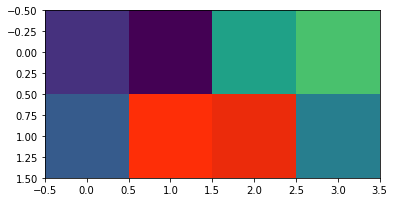

In [20]:
plt.imshow(heights)
plt.imshow(masked_hills, cmap='hsv', alpha=0.8)

In [21]:
def imshow_overlay(array, overlay, **kwargs):
    """ show overlayed image """
    
    plt.imshow(array, **kwargs)
    layer = ma.masked_where(~overlay, overlay)
    plt.imshow(layer, cmap='hsv')
    plt.show()

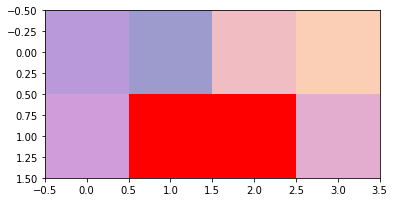

In [22]:
imshow_overlay(heights, hills, cmap='plasma', alpha=0.4)

In [23]:
def neighbourhood_4way(point):
    row, col = point
    scope = (-1, 1)
    
    for dr in scope: yield row+dr, col
    for dc in scope: yield row, col+dc

In [24]:
def show_neighbourhood(array, point, neighbourhood):
    """ show neighbourhood of our point in the terrain """
    
    neighbours = np.full(array.shape, False) # map terrain to full 0s array
    indices = zip(*neighbourhood(point))
    neighbours[[*indices]] = True # now map has some 1s fields that are neighbours of our point
    imshow_overlay(array, neighbours) 

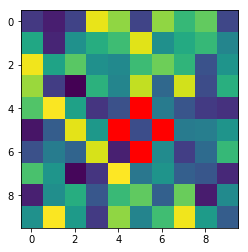

In [25]:
show_neighbourhood(terrain, (-5,5), neighbourhood_4way)

In [26]:
def neighbourhood_8way(point):
    row, col = point
    scope = (-1, 0, +1)
    return ((row+dr, col+dc) for dr in scope for dc in scope
           if dr or dc)

In [27]:
for x, y in neighbourhood_8way((0,0)):
    print(x,y);

-1 -1
-1 0
-1 1
0 -1
0 1
1 -1
1 0
1 1


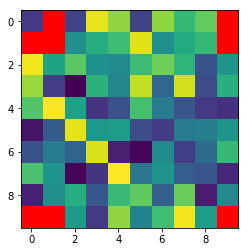

In [28]:
show_neighbourhood(terrain, (0, 0), neighbourhood_8way)

In [29]:
def neighbours(array, point, neighbourhood):
    return (pt for pt in neighbourhood(point) if inside(array, pt))

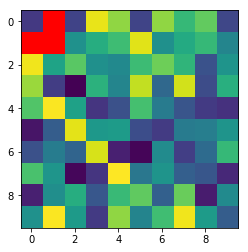

In [30]:
show_neighbourhood(terrain, (0,0), lambda pt: neighbours(terrain, pt, neighbourhood_8way))

In [31]:
plains = np.zeros_like(heights)
peaks = [(0, 3), (1, 1), (1, 2)]
row_indices, col_indices = zip(*peaks)
plains[row_indices, col_indices] = 1
plains

array([[0, 0, 0, 1],
       [0, 1, 1, 0]])

In [32]:
desert = ma.masked_all(heights.shape, dtype=int)
desert;

In [33]:
from heapq import heapify, heappush, heappop

values = np.random.permutation(np.arange(1, 10)) * 10 

heap = list(values)

heapify(heap)

heap

[10, 20, 50, 30, 60, 70, 80, 40, 90]

In [34]:
def plot_list(data, highlight=None):
    """ plot using heapify algorihtm """
    
    ax = plt.bar(*zip(*enumerate(data)))
    try: ax[data.index(highlight)].set_color('r')
    except: pass

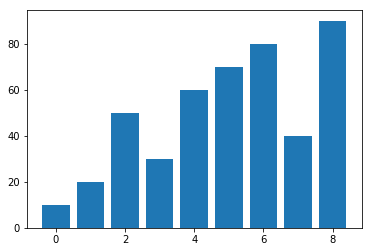

In [35]:
plot_list(heap)

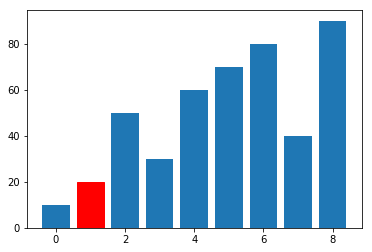

In [36]:
plot_list(heap, 20)

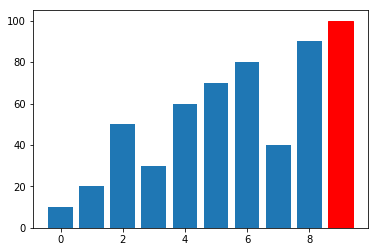

In [37]:
heappush(heap, 100)
plot_list(heap, 100)

In [38]:
# finding the shortest path on the image

In [39]:
from scipy.spatial.distance import euclidean

In [40]:
class ShortestPath:
    def __init__(self, terrain, start, 
                 neighbourhood=neighbourhood_4way, metric=euclidean):
        self.terrain = terrain
        self.start = start
        self.neighbourhood = neighbourhood
        self.metric = metric
        
        self.visited = np.full(terrain.shape, False)
        self.to_be_visited = []
        self.min_distance = np.full(terrain.shape, np.Infinity)
        self.trace_to = ma.masked_all(terrain.shape, dtype=(int, 2))

In [41]:
def is_visitable(self, point):
    return inside(self.terrain, point) and not self.visited[point]

ShortestPath.is_visitable = is_visitable

In [42]:
def tentative_distance(self, through, target):
    target_distance = self.metric((*through, self.terrain[through]),
                                 (*target, self.terrain[target]))
    return self.min_distance[through] + target_distance

ShortestPath.tentative_distance = tentative_distance

In [43]:
def update(self, through, target, new_distance):
    self.min_distance[target] = new_distance
    self.trace_to[target] = through
    heappush(self.to_be_visited, (new_distance, target))
    
ShortestPath.update = update

In [44]:
def visit(self, point):
    if not self.is_visitable(point):
        return
    for neighbour in neighbours(self.terrain, point, self.neighbourhood):
        if not self.is_visitable(neighbour):
            continue
        new_distance = self.tentative_distance(point, neighbour)
        if new_distance < self.min_distance[neighbour]:
            self.update(point, neighbour, new_distance)
    
    self.visited[point] = True

ShortestPath.visit = visit

In [45]:
def solve(self):
    self.min_distance[self.start] = 0
    self.visit(self.start)
    while self.to_be_visited:
        _, next_point = heappop(self.to_be_visited)
        self.visit(next_point)
        
ShortestPath.solve = solve

In [82]:
problem = ShortestPath(gen_terrain(height=1000, smooth=4), (10,10),
                     neighbourhood_8way)

In [83]:
problem.is_visitable((1,1));

In [84]:
problem.tentative_distance((0, 0), (1, 1));

In [85]:
problem.solve()

In [86]:
np.around(problem.min_distance,1);

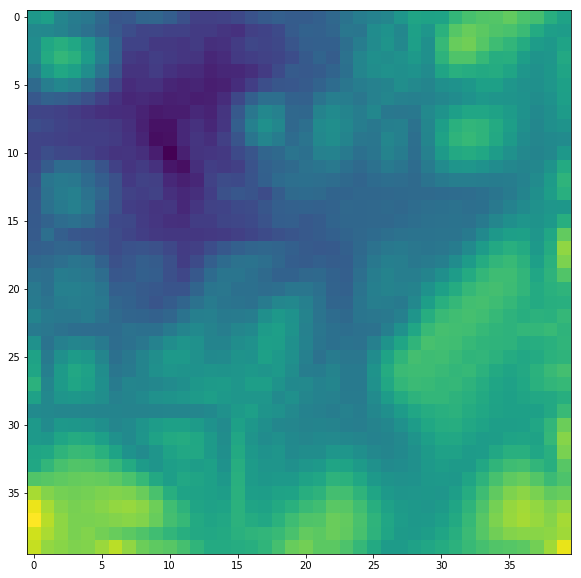

In [87]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(problem.min_distance);

In [88]:
def trace_back(self, target):
    while target != self.start:
        yield target
        target = tuple(self.trace_to[target])
    yield self.start
    
ShortestPath.trace_back = trace_back

In [89]:
small_problem = ShortestPath(np.random.random((5,5)), ((0, 0)))
small_problem.solve()

In [90]:
print(*small_problem.trace_back((4,4)))

(4, 4) (3, 4) (2, 4) (2, 3) (1, 3) (0, 3) (0, 2) (0, 1) (0, 0)


In [92]:
def paths_image (self, *targets):
    image = np.full(self.terrain.shape, False)
    for target in targets:
        path = zip(*self.trace_back(target))
        image[[*path]] = True
    return image

ShortestPath.paths_image = paths_image

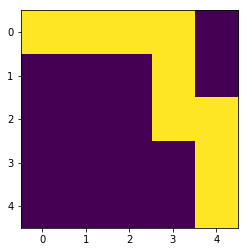

In [96]:
plt.imshow(small_problem.paths_image((4,4)));

In [97]:
problem = ShortestPath(gen_terrain(), (0,0), neighbourhood_8way)
problem.solve()

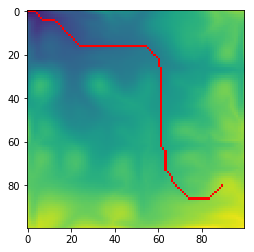

In [99]:
imshow_overlay(problem.min_distance, problem.paths_image(((80, 89))))

In [102]:
def find_paths (terrain, entry, targets, neighbourhood=neighbourhood_8way, metric=euclidean):
    problem = ShortestPath(terrain, entry, neighbourhood, metric)
    problem.solve()
    plt.figure(figsize=(12,12))
    plt.subplot(1, 2, 1)
    plt.imshow(problem.min_distance, cmap='plasma')
    plt.subplot(1, 2, 2)
    imshow_overlay(terrain, problem.paths_image(*targets), cmap='gray')
    plt.show()

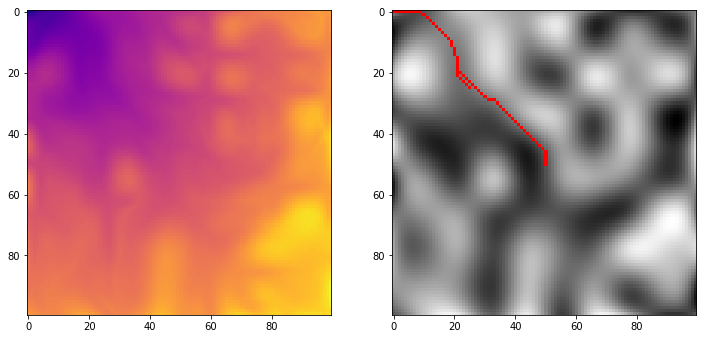

In [104]:
find_paths(gen_terrain(), (0,0), [(50,50), (25,25)])

In [105]:
from imageio import imread
image = imread('boats_sm.png').astype('float64')

In [118]:
start = (198, 49)
targets = [(160, 103), (104, 102), (50, 103)]

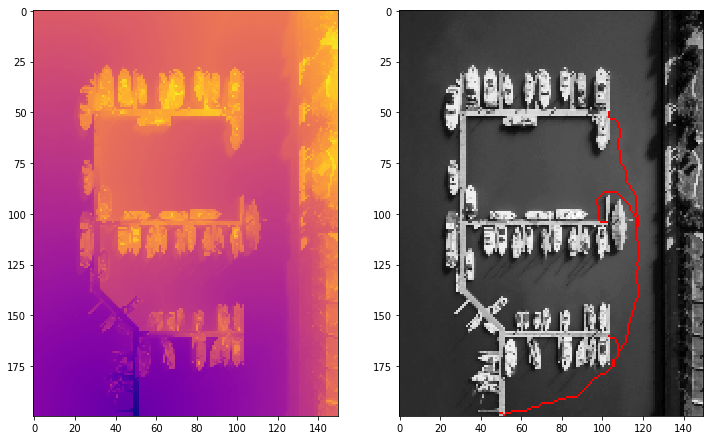

In [119]:
find_paths(image, start, targets)

In [120]:
def dissimilarity_to (reference):
    def metric (pixel_1, pixel_2):
        value = lambda pixel: pixel[2]
        distance_to_reference = abs(value(pixel_2) - reference)
        distance_to_other = abs(value(pixel_1) - value(pixel_2))
        return distance_to_reference * distance_to_other
    return metric

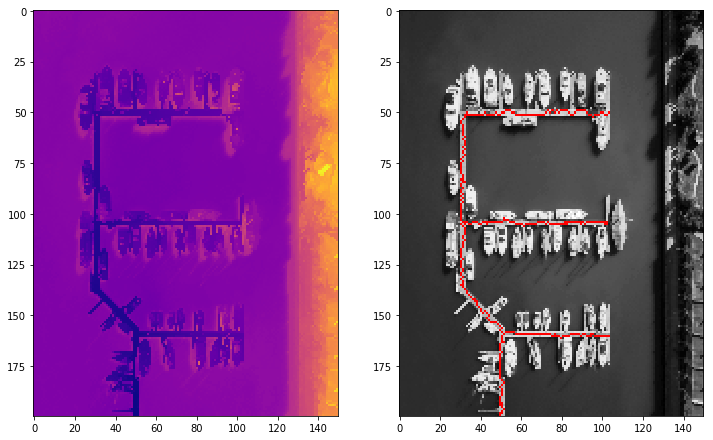

In [121]:
find_paths(image, start, targets, metric=dissimilarity_to(image[start]))